<a href="https://colab.research.google.com/github/VU-CSP/improc_assignment2-egfrankel/blob/main/Digital_Image_Analysis_2_assignment_EGF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import matplotlib.pyplot as plt # Library used for plotting
from matplotlib.patches import Rectangle # module to plot a rectangle in the image
import numpy as np # library for array manipulation
import seaborn as sn # plotting library
import pandas as pd # data frames library
import tifffile # library to store numpy arrays in TIFF
import skimage # Library for image manipulation
from skimage.io import imread # sublibrary from skimage
from scipy.ndimage import gaussian_filter
from skimage.filters import difference_of_gaussians
from skimage import transform
import os

In [2]:
import ipywidgets as widgets # Importing library
from ipywidgets import interact, interactive, HBox, Layout, VBox #  importing modules and functions.

In [3]:
if not os.path.exists("./FISH_example.tif"):
   !wget -O FISH_example.tif "https://www.dropbox.com/s/669j6zags6xd7gr/FISH_example.tif?dl=1"

In [4]:
if not os.path.exists("./image_cell.tif"):
    !wget -O image_cell.tif https://ndownloader.figshare.com/files/26751209

In [5]:
# reading the image and saving as variable img
img = imread('./image_cell.tif')
img.shape

(35, 512, 512, 3)

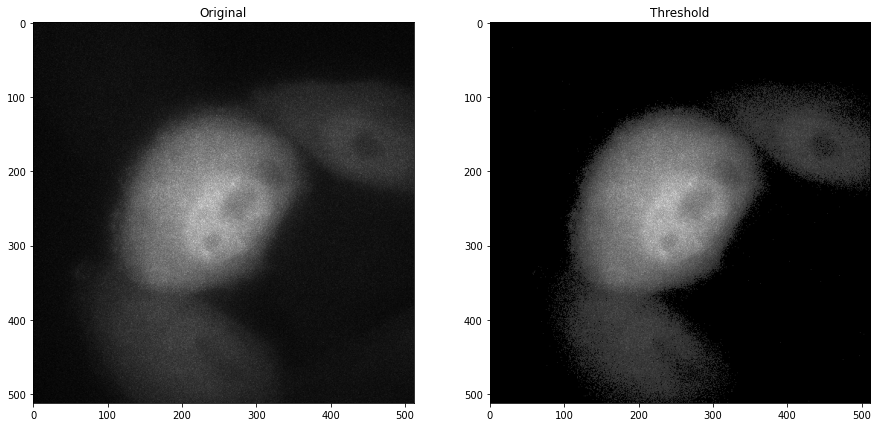

In [7]:
# Task 1
## make an image `img1` from just the red channel (channel 0) at time point 23 of the tensor [T,Y,X,C]  

# add your code here

img1 = img[23,:,:,0]

# plotting it without color
# fig, ax = plt.subplots(1,2, figsize=(25, 10))
# ax[0].imshow(img1,cmap='gray')
# plt.show()

# Task 2
## Using `img1`, create a new image `img2` where values less than than the mean are set to the 
## background value (calculated as the minimum intensity value in the image).

img2 = img1.copy() # change as appropriate
img2[img2 < np.mean(img2) ]= np.amin(img2)  # thresholding image values larger than the mean equal to the mean.


# plot the results
# Side-by-side comparizon
fig, ax = plt.subplots(1,2, figsize=(15, 7))
ax[0].imshow(img1,cmap='gray')
ax[0].set(title='Original')

ax[1].imshow(img2,cmap='gray')
ax[1].set_title('Threshold')
plt.show()

Task 3.

Set img2[0:20,0:20] = np.amax(img2) (Make a white box in the image to more easily visualize the transformation)
Compress img2 in half, rotate it 30 degrees clockwise, and translate its (0,0) to (dx,dy)=(200,100)
Save resulting image as img3
Plot img3 side-by-side with img2

Transformation matrix : 
 [[  0.4330127  -0.25      200.       ]
 [  0.25        0.4330127 100.       ]
 [  0.          0.          1.       ]] 



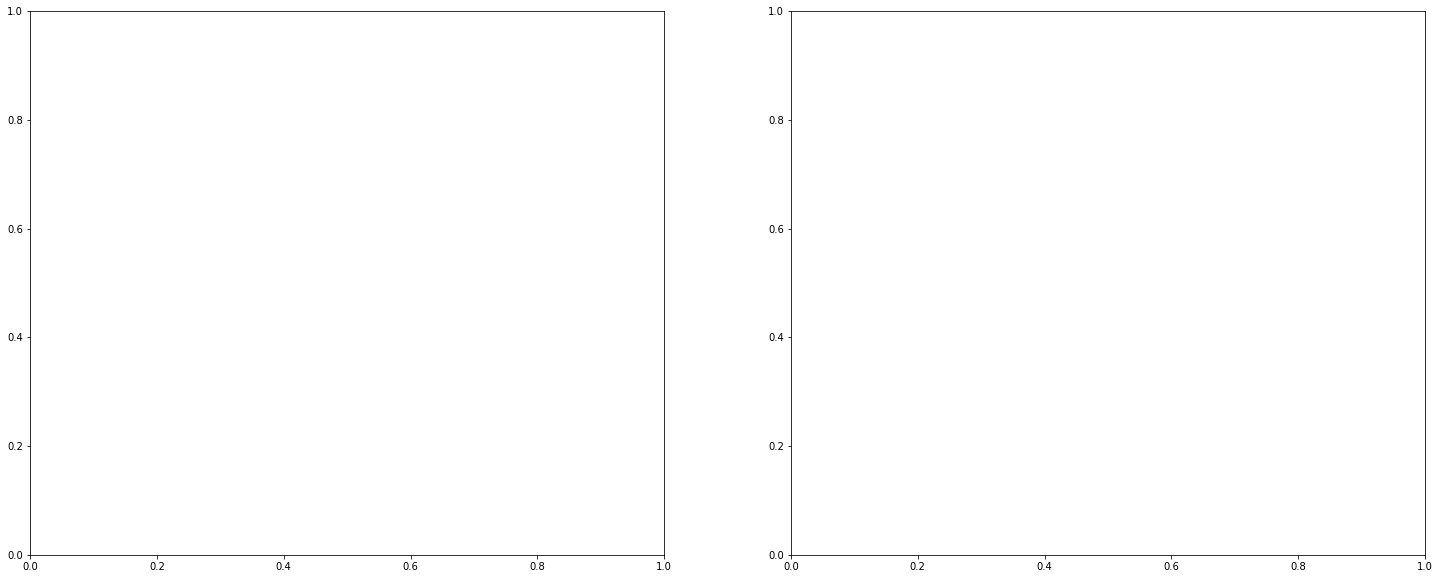

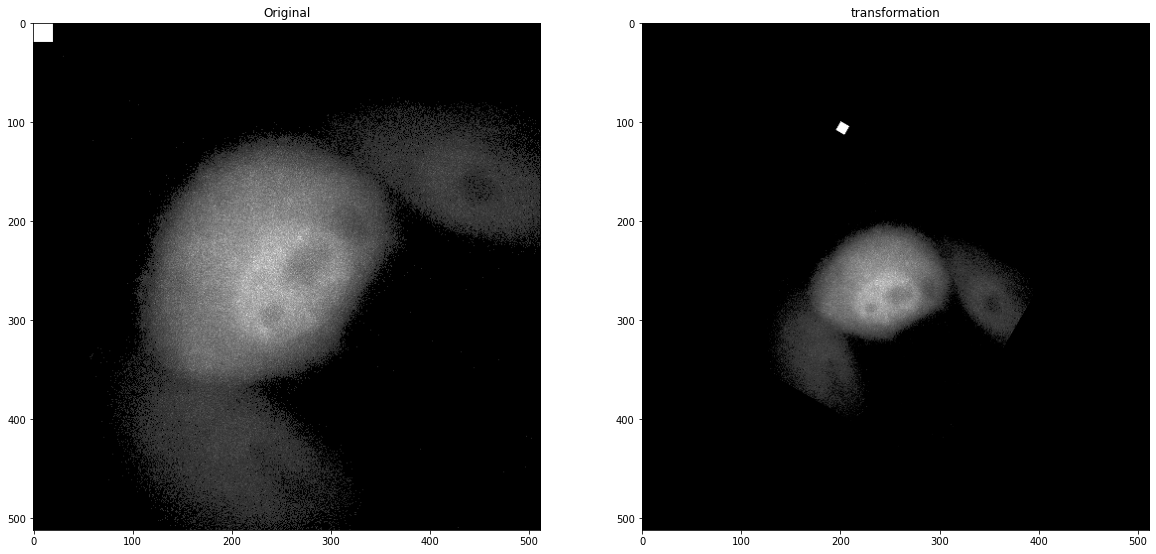

In [9]:
img2[0:20,0:20] = np.amax(img2)
# Make a white box

# fig, ax = plt.subplots(1,2, figsize=(25, 10))
# ax[0].imshow(img2,cmap='gray') 
# ax[0].add_patch(Rectangle(xy=(0, 0),width=20,height=20,linewidth=3,color='red',fill=False))


#  transformation matrix
tform = transform.SimilarityTransform(
    scale = 0.50,                  # float, scaling value
    rotation = np.pi/6,           # Rotation angle in counter-clockwise direction as radians. pi/180 rad = 1 degrees
    translation=(200, 100))          # (x, y) values for translation .
print('Transformation matrix : \n', tform.params , '\n')
img3 = transform.warp(img2, tform.inverse)


# plot the results
# Side-by-side comparizon
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].imshow(img2,cmap='gray')
ax[0].set(title='Original')
ax[1].imshow(img3,cmap='gray')
ax[1].set_title('transformation')
plt.show()

Task 5.

Make a slice of img_FISH and save as img_FISH_slice using: Z=10, Y=120:350, X=50:250

Apply a Gaussian filter to img_FISH_slice with sigma=1 and save it as img_gaussian_filter_simga_1

Make difference of Gaussians filter of img_FISH_slice using low_sigma=1 and high_sigma=5 and img_diff_gaussians
Plot all 3 images side-by-side (in 3 subplots).

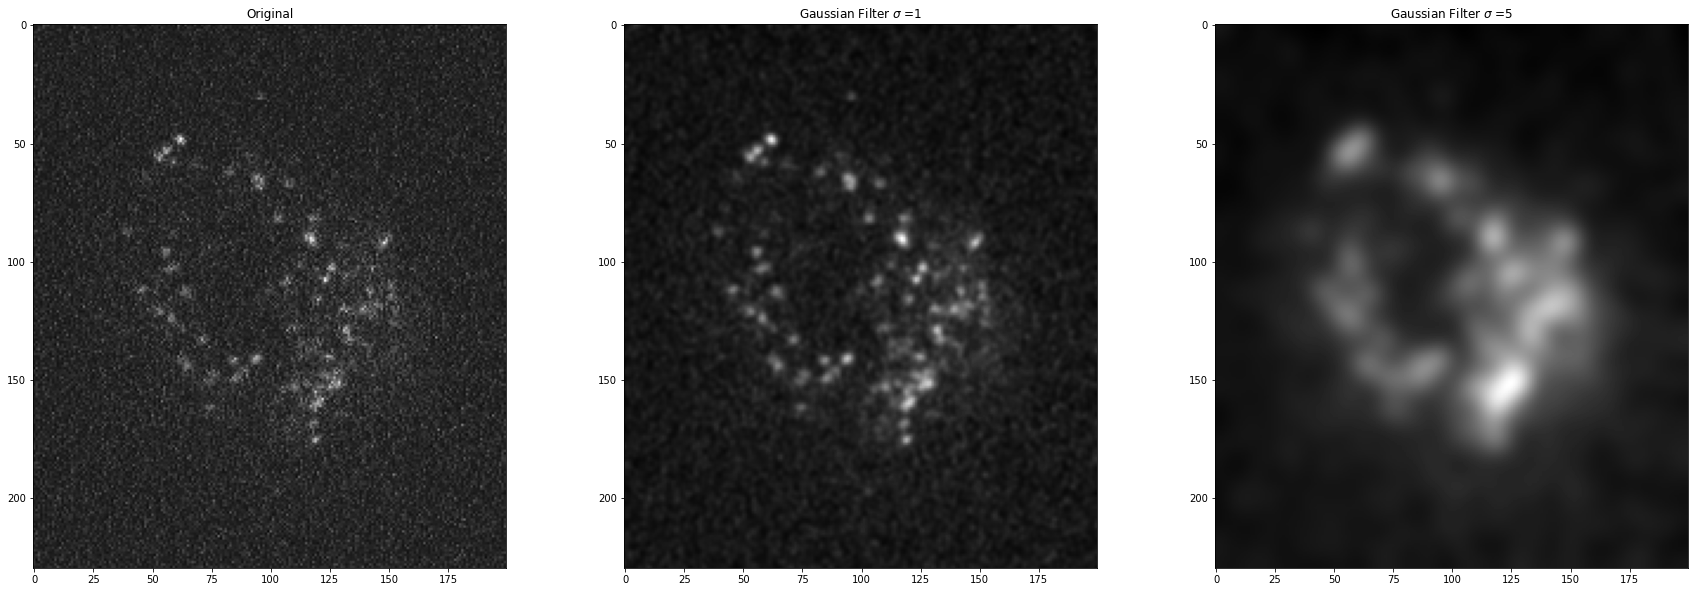

In [42]:
# importing the FISH image as variable img_FISH
img_FISH = imread('./FISH_example.tif') 


# Make a slice of the sequence of images
img_FISH_slice = img_FISH[10, 120:350, 50:250] 

from scipy.ndimage import gaussian_filter


# Applying the filter
img_gaussian_filter_simga_1 = gaussian_filter(img_FISH_slice, sigma=1)
# img_gaussian_filter_simga_5 = gaussian_filter(img_FISH_slice, sigma=5)
img_diff_gaussians = difference_of_gaussians(img_FISH_slice,low_sigma=1, high_sigma=5)

# Side-by-side comparizon
# fig, ax = plt.subplots(1,3, figsize=(30, 10))
# ax[0].imshow(img_FISH_slice,cmap='gray')
# ax[0].set(title='Original')

# # Sigma 1 
# ax[1].imshow(img_gaussian_filter_simga_1,cmap='gray')
# ax[1].set(title='Gaussian Filter $\sigma$ =1')

# # Sigma 5
# ax[2].imshow(img_gaussian_filter_simga_5,cmap='gray')
# ax[2].set(title='Gaussian Filter $\sigma$ =5')
# plt.show()






# img_diff_gaussians = [] # modify as appropriate

<ipython-input-43-231c3d815a17>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if img_diff_gaussians != []:


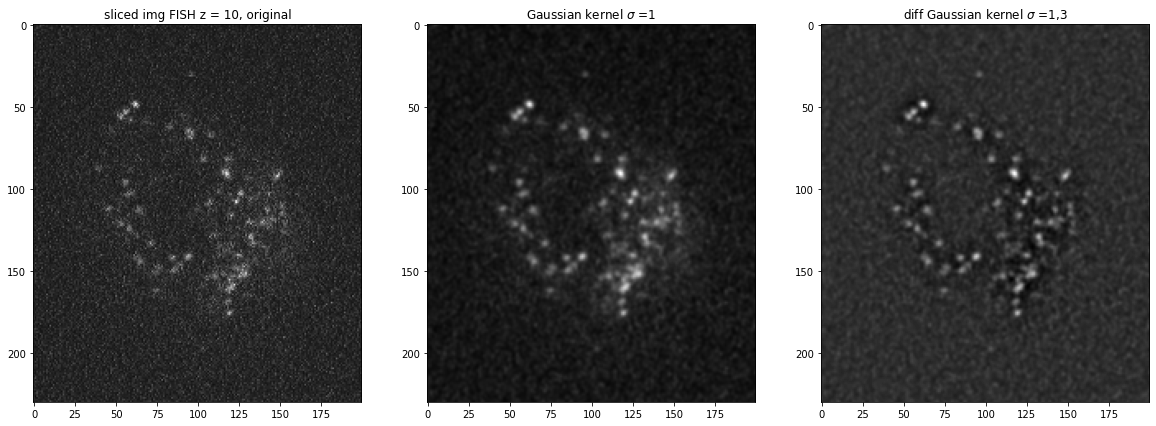

In [43]:
# The code below should plot your results for Task 5 once the variables are defined correctly
if img_diff_gaussians != []:
    fig, ax = plt.subplots(1,3, figsize=(20, 10))
    ax[0].imshow(img_FISH_slice,cmap='gray')
    ax[0].set(title='sliced img FISH z = 10, original')
    ax[1].imshow(img_gaussian_filter_simga_1,cmap='gray')
    ax[1].set(title='Gaussian kernel $\sigma$ =1')
    ax[2].imshow(img_diff_gaussians,cmap='gray')
    ax[2].set(title='diff Gaussian kernel $\sigma$ =1,3')
    plt.show()